In [2]:
import warnings
warnings.filterwarnings(action='ignore')
import requests
# from bs4 import BeautifulSoup
from datetime import datetime as dt

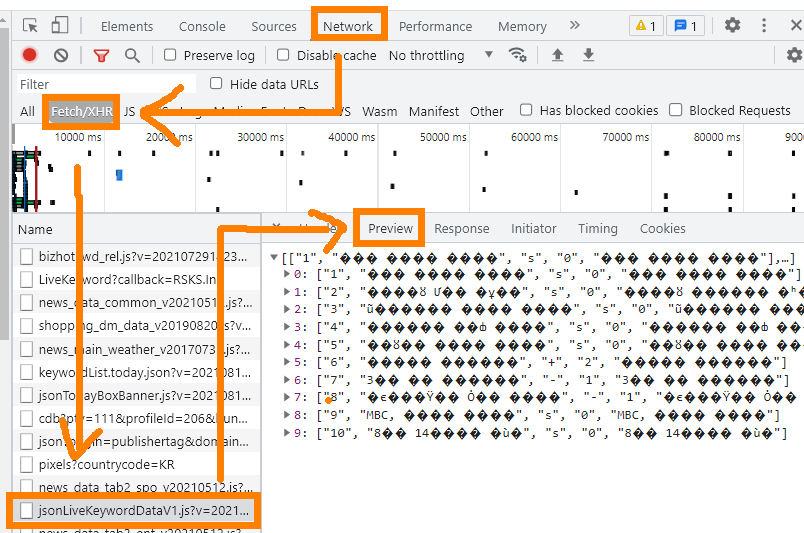

In [3]:
from IPython.display import Image
Image('./nateAjax.png', width='800')

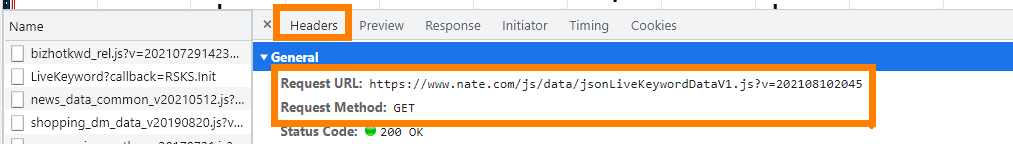

In [5]:
from IPython.display import Image
Image('./nateAjax2.png', width='1000')

In [34]:
# 실시간 검색어가 웹 페이지에 전부 혹은 일부가 포함되어있지 않고 ajax를 이용해서 실시간으로 받아오는 방식을 사용한다.
# Request Method가 GET이므로 requests 모듈의 get() 메소드를 사용해서 실시간 검색어를 얻어온다.
targetSite = 'https://www.nate.com/js/data/jsonLiveKeywordDataV1.js?v=202108102045'
request = requests.get(targetSite)
print(request)

<Response [200]>


In [35]:
issues = request.text
print(type(issues)) # <class 'str'>, ajax로 처리되는 데이터는 무조건 문자열 형태로 얻어온다.
print(issues)

<class 'str'>
[["1",  "백신 접종 예약",  "s",  "0",  "백신 접종 예약"], ["2",  "세월호 특검 불기소",  "s",  "0",  "세월호 유족들 않고"], ["3",  "크래프톤 상장 공모가",  "s",  "0",  "크래프톤 상장 공모가"], ["4",  "광복절 집회 금지",  "s",  "0",  "광복절 집회 금지"], ["5",  "김호중 폭행 종결",  "s",  "0",  "김호중 폭행 종결"], ["6",  "생방송 투데이",  "s",  "0",  "생방송 투데이"], ["7",  "3살 딸 만나러",  "s",  "0",  "3살 딸 만나러"], ["8",  "하데스타운 확진 개막",  "s",  "0",  "하데스타운 확진 개막"], ["9",  "MBC, 경찰 기자",  "s",  "0",  "MBC, 경찰 기자"], ["10",  "8월 14일은 택배",  "s",  "0",  "8월 14일은 택배"]]


In [36]:
# requests 모듈의 json() 메소드로 서버에 요청해서 전달받은 데이터를 파이썬에 처리하기게 적합하도록 리스트나 딕셔너리 타입으로
# 변환한다. => 데이터가 []로 묶여있으면 리스트로 {}로 묶여있으면 딕셔너리로 자동 변환한다.
ranks = request.json()
print(type(ranks)) # <class 'list'>
print(ranks)

<class 'list'>
[['1', '백신 접종 예약', 's', '0', '백신 접종 예약'], ['2', '세월호 특검 불기소', 's', '0', '세월호 유족들 않고'], ['3', '크래프톤 상장 공모가', 's', '0', '크래프톤 상장 공모가'], ['4', '광복절 집회 금지', 's', '0', '광복절 집회 금지'], ['5', '김호중 폭행 종결', 's', '0', '김호중 폭행 종결'], ['6', '생방송 투데이', 's', '0', '생방송 투데이'], ['7', '3살 딸 만나러', 's', '0', '3살 딸 만나러'], ['8', '하데스타운 확진 개막', 's', '0', '하데스타운 확진 개막'], ['9', 'MBC, 경찰 기자', 's', '0', 'MBC, 경찰 기자'], ['10', '8월 14일은 택배', 's', '0', '8월 14일은 택배']]


In [40]:
# json 모듈의 import 하고 loads() 메소드를 사용해서 json 형태의 문자열 데이터를 파이썬에서 처리할 수 있는 리스트나 딕셔너리 
# 타입으로 변환한다. => 데이터가 []로 묶여있으면 리스트로 {}로 묶여있으면 딕셔너리로 자동 변환한다.
import json
ranks = json.loads(request.text)
print(type(ranks)) # <class 'list'>
for rank in ranks:
    print(rank)

<class 'list'>
['1', '백신 접종 예약', 's', '0', '백신 접종 예약']
['2', '세월호 특검 불기소', 's', '0', '세월호 유족들 않고']
['3', '크래프톤 상장 공모가', 's', '0', '크래프톤 상장 공모가']
['4', '광복절 집회 금지', 's', '0', '광복절 집회 금지']
['5', '김호중 폭행 종결', 's', '0', '김호중 폭행 종결']
['6', '생방송 투데이', 's', '0', '생방송 투데이']
['7', '3살 딸 만나러', 's', '0', '3살 딸 만나러']
['8', '하데스타운 확진 개막', 's', '0', '하데스타운 확진 개막']
['9', 'MBC, 경찰 기자', 's', '0', 'MBC, 경찰 기자']
['10', '8월 14일은 택배', 's', '0', '8월 14일은 택배']


In [39]:
for i in range(len(ranks)):
    print('{0:>2s}위 {1}'.format(ranks[i][0], ranks[i][1]), end=' ')
    if ranks[i][2] == '+':
        print('↑{}'.format(ranks[3]))
    elif ranks[i][2] == '-':
        print('↓{}'.format(ranks[3]))
    elif ranks[i][2] == 's':
        print('-'.format(ranks[3]))
    else:
        print(ranks[i][2])

 1위 백신 접종 예약 -
 2위 세월호 특검 불기소 -
 3위 크래프톤 상장 공모가 -
 4위 광복절 집회 금지 -
 5위 김호중 폭행 종결 -
 6위 생방송 투데이 -
 7위 3살 딸 만나러 -
 8위 하데스타운 확진 개막 -
 9위 MBC, 경찰 기자 -
10위 8월 14일은 택배 -
